<img src="signature-informal.png" alt="Drawing" style="width: 500px;"/>

# Machine Learning Basics
This tutorial is about basics terminology and practices of machine learning.


## Basic Concepts of Machine Learning
**What is machine learning?**
* Make sense of the data by identifying patterns in it
* Uncover ”interesting” relationships among the variables
* Predict future behavior

** Multiple Categories of Machine Learning **
<img src="MLcategory.png">
* _Supervised Learning_: X(independent variables) and Y(dependent variable) are observed, goal is to understand relationship between X and Y
* _Unsupervised Learning_: Only X is observed, goal is to understand relationship within X
* _Classification_: Response variable Y can only pick a limited number of values from a pool of class labels
* _Regression_: Response variable Y can pick values from a continuous range.

** Common Procedure of Supervised Learning**

<img src="Supervised_Learning.png">

## A Concrete Example: [MNIST](https://en.wikipedia.org/wiki/MNIST_database)
First let's import packages and the dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # these two are for plotting
import pandas as pd # dataframe
import numpy as np # arrays, matrices etc.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

An example of one of the images.(Can you recognize the number?)

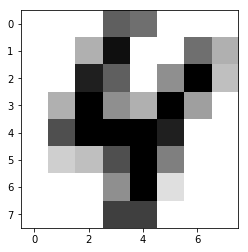

In [4]:
plt.imshow(digits.images[1023], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Now let's dive into our very first example of machine learning. We are assuming that the idea of _K nearest neighbour_(KNN) could apply well to the dataset. _K nearest neighbour_ assumes that we predict the label of a new point to be the majority of K nearest points around it. The definition of "nearest" can vary from dataset to dataset based on our judgement.

In [7]:
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.model_selection import train_test_split # package for splitting the whole dataset into training and testing

The following code is how we split the whole dataset into training and testing sets.

In [8]:
X = digits.data
y = digits.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=30, stratify=y)

For KNN, we need to preassume the number of nearest neighbours we want to pick before generate a mature model for our dataset. Let's pick 7 here.

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)

Inform the model object by feeding into the training data.

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Check the accuracy of our model.

In [12]:
print(knn.score(X_test, y_test))

0.9833333333333333


Now we are done with our very first cycle of machine learning! But we still have some questions unsolved. As to the `n_neighbour` parameter, which is the optimal value for us to pick? Let's try!

In [50]:
neighbors = np.arange(1, 10) # try values from 1 to 10
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) # initialize an array to store the accuracy as to different n_neighbors

In [24]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

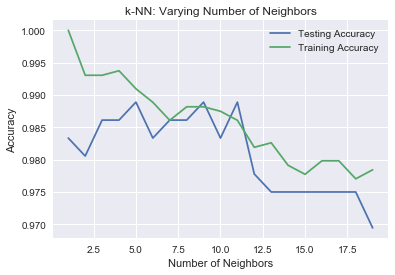

In [25]:
sns.set()
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see two trends:
1. For the training accuracy, it is growing as the number of `n_neighbours` decreases.
2. For the test accuracy, it meets the highest value when `n_neighbours` is 5, 8 and 11.
3. This figure illustrates a very important concept of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting). 

## Summary:
1. The meaning of machine learning
2. Different types of machine learning
3. Common Procedure of machine learning
4. Learn about K nearest neighbour classifier.
5. Acknowledge the importance of parameter tuning and the caveat of overfitting.